In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import deconomix
import warnings

In [2]:
sc_df_train, sc_df_test = deconomix.utils.load_example()

Raw data already downloaded
Importing Data to Python ...
Using cached, preprocessed data
Done


In [3]:
sc_df_train = sc_df_train.loc[:, sc_df_train.columns != 'B']
sc_df_train

Celltypes,T,T,T,T,T,T,T,T,T,T,...,T,Macro,T,T,T,NK,T,T,T,T
Genes,,,,,,,,,,,,,,,,,,,,,
HLA-DRA,7.1039,0.000,8.0937,0.0000,0.0,0.0000,6.7119,0.0000,1.4340,0.0000,...,0.0000,8.5295,6.92,1.7807,1.7609,0.0000,0.0000,0.0,7.6780,2.1437
TYROBP,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,6.8966,0.0000,...,0.0000,8.9072,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000
NKG7,9.9395,0.000,8.7809,8.8223,0.0,0.0000,8.6361,9.0137,0.0000,0.0000,...,9.5755,0.0000,0.00,6.2134,0.0000,9.5716,6.8576,0.0,8.2995,7.6050
IGFBP7,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.00,0.0000,0.0000,5.6724,0.0000,0.0,2.5356,0.0000
FCER1G,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,8.6080,0.00,0.0000,0.0000,8.0265,0.0000,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IMPDH2,0.0000,0.000,0.0000,0.0000,0.0,0.0000,5.4599,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.00,7.1704,0.0000,0.0000,0.0000,0.0,0.0000,0.0000
SAR1A,0.0000,4.932,0.0000,0.0000,0.0,6.9077,6.0170,6.5505,6.4357,5.0883,...,0.0000,3.9191,0.00,5.1604,5.0454,6.5207,5.4820,0.0,5.9684,3.6781
RBMS3,0.0000,0.000,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.0000


In [4]:
_, bulk_df_test, C_test = deconomix.utils.simulate_data(sc_df_test, 1000, 100)

In [5]:
model = deconomix.models.Deconomix(verbose = True)

Simulating artificial bulks...
Artificial bulks simulated.
Optimizing gene weights via DTD algorithm...


i = 1000, loss = -4.924850e+00: 100%|██████████| 1000/1000 [00:04<00:00, 241.81it/s]


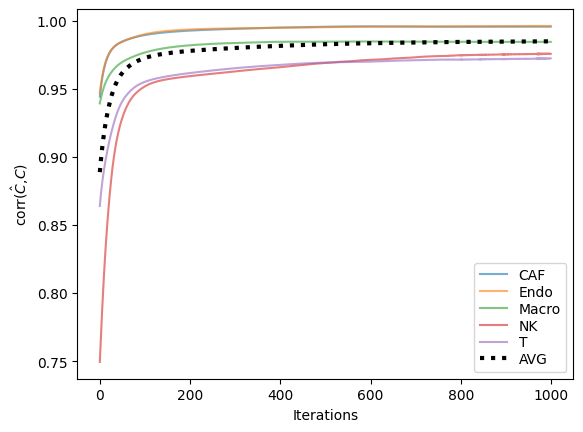

Gene weights optimized.


In [6]:
model.fit(sc_df_train)

Simulating test bulks...
Test bulks simulated.


i = 2, err = -4.34e-19 - Convergence reached!:   0%|          | 2/1000 [00:00<02:39,  6.24it/s]                                                


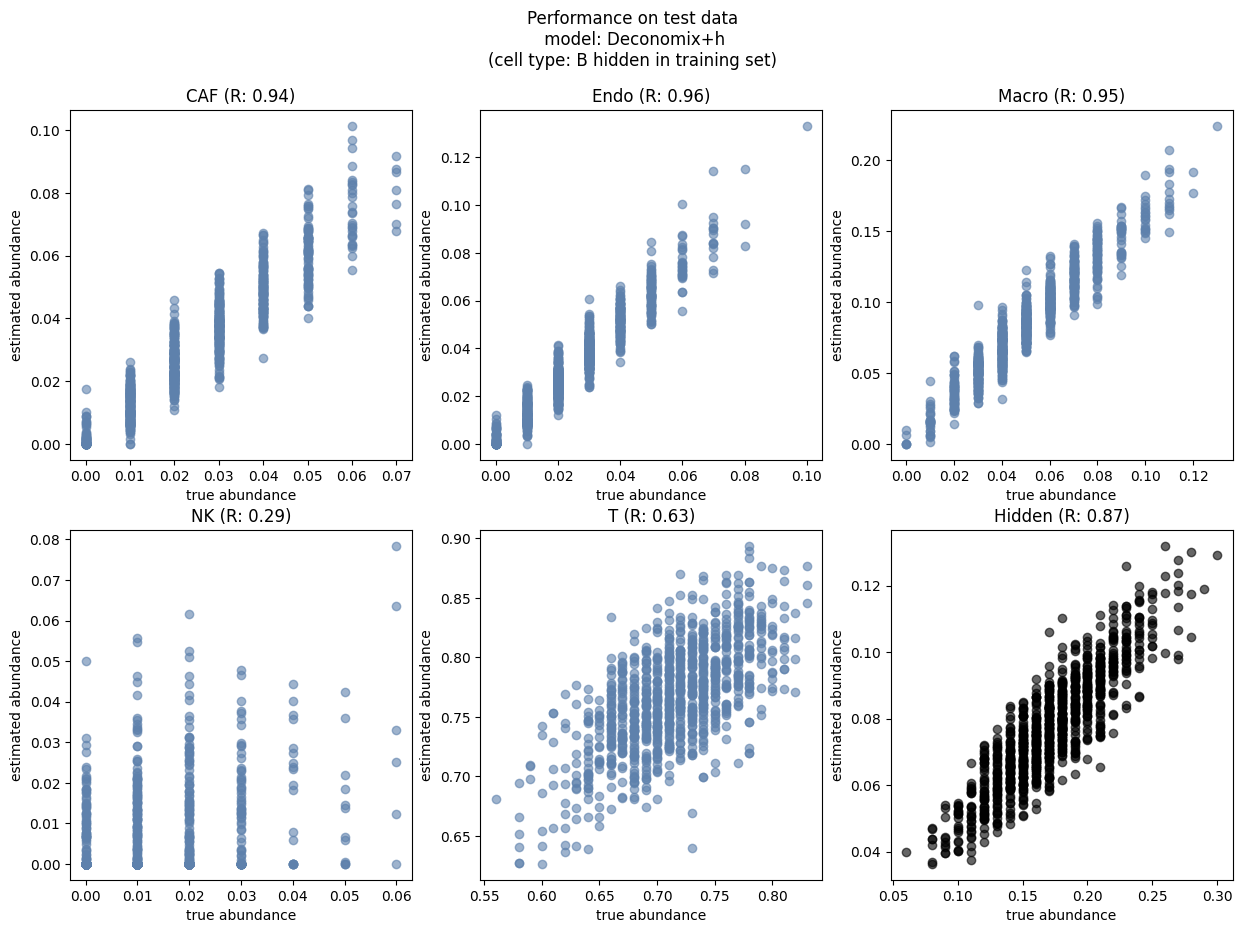

CAF       0.943888
Endo      0.956149
Macro     0.953349
NK        0.288487
T         0.632043
hidden    0.865582
dtype: float64


In [7]:
model.validate_fit(sc_df_test, plot=True, hidden_ct = 'B')

In [8]:
model.predict(bulk_df_test, model = 'Deconomix+h,r', lambda2=1e-6)

Applying ADTD algorithm to infer hidden background contributions and cell-type-specific gene regulation.


i = 48, err = 9.75e-09 - Convergence reached!:   5%|▍         | 48/1000 [00:27<09:12,  1.72it/s]                                                 


In [9]:
model.C_est


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Celltypes,,,,,,,,,,,,,,,,,,,,,
CAF,0.056517,0.043870,0.037891,0.016497,0.026752,0.068717,0.024241,8.183065e-03,0.037726,0.050962,...,0.009916,1.620939e-02,4.299852e-03,0.000000,0.021660,0.039305,0.012408,0.015452,0.018256,0.023011
Endo,0.013931,0.041386,0.065052,0.020044,0.010306,0.052604,0.038382,1.266920e-02,0.028388,0.031315,...,0.058641,2.948418e-02,0.000000e+00,0.039131,0.047145,0.052764,0.051033,0.068358,0.037731,0.056789
Macro,0.075753,0.065833,0.078428,0.095397,0.092312,0.041224,0.102667,7.804843e-02,0.143874,0.059717,...,0.099254,9.342750e-02,9.024734e-02,0.091885,0.040808,0.069068,0.057484,0.080216,0.075453,0.174482
NK,0.002151,0.022286,0.000000,0.000000,0.007408,0.000000,0.000000,3.469447e-18,0.000000,0.000000,...,0.000000,1.734723e-18,3.469447e-18,0.000000,0.000000,0.000000,0.013599,0.000000,0.000000,0.000000
T,0.781614,0.756032,0.738696,0.778648,0.798180,0.776286,0.762876,8.285645e-01,0.730881,0.751545,...,0.745528,7.858715e-01,7.796219e-01,0.760485,0.793437,0.758089,0.793978,0.744105,0.817608,0.703878


In [10]:
model.c_est

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
hidden,0.070034,0.070594,0.079932,0.089414,0.065042,0.061169,0.071834,0.072535,0.059131,0.10646,...,0.086661,0.075007,0.125831,0.1085,0.09695,0.080773,0.071498,0.091869,0.050952,0.04184


In [11]:
model.x_est

,0
Genes,
HLA-DRA,0.010579
TYROBP,0.000763
NKG7,0.000000
IGFBP7,0.001627
FCER1G,0.000125
...,...
IMPDH2,0.001811
SAR1A,0.000000
RBMS3,0.000432


In [12]:
model.Delta_est

Celltypes,CAF,Endo,Macro,NK,T
Genes,,,,,
HLA-DRA,0.999891,0.997294,1.020912,1.006084,1.096669
TYROBP,1.000000,0.997507,0.926375,0.928230,0.988041
NKG7,1.000000,0.999748,1.000000,1.047943,1.020857
IGFBP7,0.999898,1.003622,1.001643,1.004145,1.001873
FCER1G,1.000000,0.996359,0.907895,0.945460,0.982369
...,...,...,...,...,...
IMPDH2,0.976331,0.983016,1.007737,1.003490,1.012675
SAR1A,0.985849,0.994614,0.991303,1.014392,0.833038
RBMS3,1.379927,1.044317,1.002701,1.000000,1.093406
